In [1]:
#引入watermark这个包
%load_ext watermark


UsageError: unrecognized arguments: pandas, matplotlib, scipy, sklearn


In [2]:
#打印这些库的版本
%watermark -a "Luo" -d -v -m -p numpy, pandas, matplotlib, scipy, sklearn

UsageError: unrecognized arguments: pandas, matplotlib, scipy, sklearn


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
x, y = digits.data, digits.target

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [13]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
gaus = GaussianNB().fit(xtrain, ytrain)

In [15]:
gaus.score(xtest, ytest)

0.8518518518518519

In [17]:
gaus.predict_proba(xtest)[1, :].sum()

1.0000000000000007

In [18]:
ypred = gaus.predict(xtest)

In [19]:
#使用混淆矩阵来查看分类情况
from sklearn.metrics import confusion_matrix 
confusion_matrix(ytest, ypred)

array([[52,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 37,  2,  0,  0,  0,  0,  2,  6,  3],
       [ 0,  3, 31,  0,  0,  0,  1,  0, 12,  0],
       [ 0,  0,  2, 41,  0,  0,  1,  0,  8,  2],
       [ 0,  0,  0,  0, 51,  0,  2,  7,  0,  0],
       [ 0,  0,  0,  1,  0, 62,  1,  2,  0,  0],
       [ 0,  0,  0,  0,  1,  1, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 54,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  2, 39,  0],
       [ 0,  1,  1,  1,  0,  2,  1,  7,  4, 42]], dtype=int64)

### 高斯朴素贝叶斯擅长数据集 

In [20]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

## 贝叶斯拟合特性 

In [28]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

In [24]:
#交叉验证的模式
cv = ShuffleSplit(n_splits=50 #分成50份
                    , test_size=.2 #选择0.2的数据作为测试集合
                    , random_state=42)

In [26]:
#画学习曲线函数
def plot_learning_curve(estimator, title, x, y
                       , ax
                       , ylim=None
                       , cv=None
                       , n_jobs = None):
    train_sizes, train_scores, test_scores = learning_curve(estimator
                                                           , x, y, cv=cv
                                                           , n_jobs=n_jobs)#n_jobs可并行线程
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid()#网格作为背景
    ax.plot(train_sizes, np.mean(train_scores,axis=1), 'o-', color='r', label='Training score')
    ax.plot(train_sizes, np.mean(test_scores,axis=1), 'o-', color='g', label='Test score')
    ax.legend(loc="best")         
    return ax

In [29]:
title = ["Naive Bayers", 'DecisionTree', "SVM,RBF kernel", "RandomForest", "Logistic"]
model = [GaussianNB(), DecisionTreeClassifier()
        , SVC(gamma=0.001),RandomForestClassifier(n_estimators=50)
        , LogisticRegression(C=.1, solver='lbfgs')]

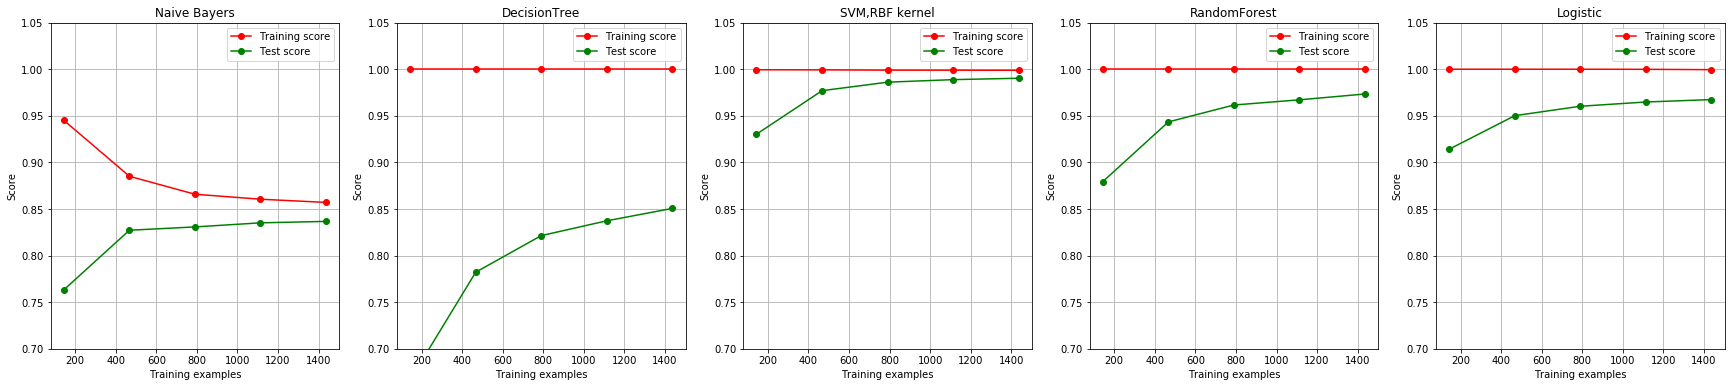

In [30]:
fig, axes = plt.subplots(1, 5, figsize=(30, 6))
for ind, title_, estimator in zip(range(len(title)), title, model):
    plot_learning_curve(estimator, title_, x, y
                       , ax=axes[ind], ylim=[0.7, 1.05], n_jobs=4, cv=cv)

### 概率预测评估标准

In [31]:
from sklearn.metrics import brier_score_loss

In [34]:
prob = gaus.predict_proba(xtest)

In [39]:
ytest.shape

(540,)

In [49]:
brier_score_loss(y_true=ytest,y_prob= prob[:, 8], pos_label=8)

ValueError: Only binary classification is supported. Labels in y_true: [0 1 2 3 4 5 6 7 8 9].

In [50]:
from sklearn.metrics import log_loss
log_loss(ytest, prob)

2.492297679094634

### 可靠性曲线 

In [51]:
from sklearn.datasets import make_classification #制造符合要求的数据集

In [52]:
x, y = make_classification(n_samples=100000, n_features=20
                          , n_classes=2
                          , n_informative=2
                          , n_redundant=10
                          , random_state=42)

In [54]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.99, random_state=42)

In [55]:
gaus = GaussianNB().fit(xtrain, ytrain)
ypred = gaus.predict(xtest)
yprob = gaus.predict_proba(xtest)[:, 1]

In [57]:
import pandas as pd

C:\Users\Administrator\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [58]:
df = pd.DataFrame({"ytrue":ytest[:500], "probability":yprob[:500]})

In [59]:
df = df.sort_values("probability")
df.index = range(df.shape[0])
df

,ytrue,probability
0,0,1.824809e-21
1,0,6.610435e-21
2,0,4.171566e-19
3,0,8.441773e-18
4,0,1.463199e-17
...,...,...
495,1,1.000000e+00
496,1,1.000000e+00
497,1,1.000000e+00
498,1,1.000000e+00


In [61]:
gaus_score = gaus.score(xtest, ytest)

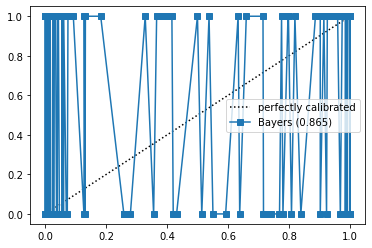

In [64]:
fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0, 1], [0, 1], "k:", label="perfectly calibrated")#对角线
ax1.plot(df.probability, df.ytrue, "s-", label="%s (%1.3f)"%("Bayers", gaus_score))
ax1.legend()

In [65]:
from sklearn.calibration import calibration_curve

C:\Users\Administrator\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


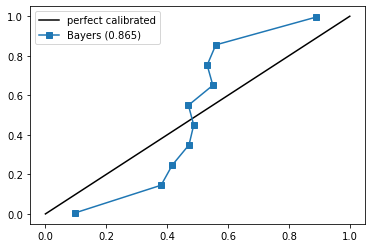

In [68]:
trueprob, predprob = calibration_curve(ytest, yprob, n_bins=10)

fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0, 1], [0, 1], "k-", label="perfect calibrated")
ax1.plot(trueprob, predprob, "s-", label="%s (%1.3f)" % ("Bayers", gaus_score))
ax1.legend()
plt.show()

In [69]:
from sklearn.datasets import make_blobs

In [70]:
x, y = make_blobs(n_samples=[500, 500]
                 ,centers=[[0.0, 0.0], [2.0, 2.0]]
                 ,cluster_std=[0.5, 0.5]
                 ,random_state=0
                 ,shuffle=False)

In [71]:
x

array([[ 0.88202617,  0.2000786 ],
       [ 0.48936899,  1.1204466 ],
       [ 0.933779  , -0.48863894],
       ...,
       [ 2.09891408,  2.0488754 ],
       [ 2.70076171,  2.07921692],
       [ 1.42904929,  1.34451481]])